In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.patches as patches
import scipy.stats as stats


 


In [2]:
sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.settings.n_jobs=15
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42



In [3]:
sc.settings.set_figure_params(dpi=50, dpi_save=300, facecolor="white", frameon=False, figsize=(18,18))


# fig 6a

In [4]:
sc.settings.figdir = "fig6"


In [5]:
PATH='/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_lesional11.h5ad'
adata_lesional=sc.read_h5ad(PATH)

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


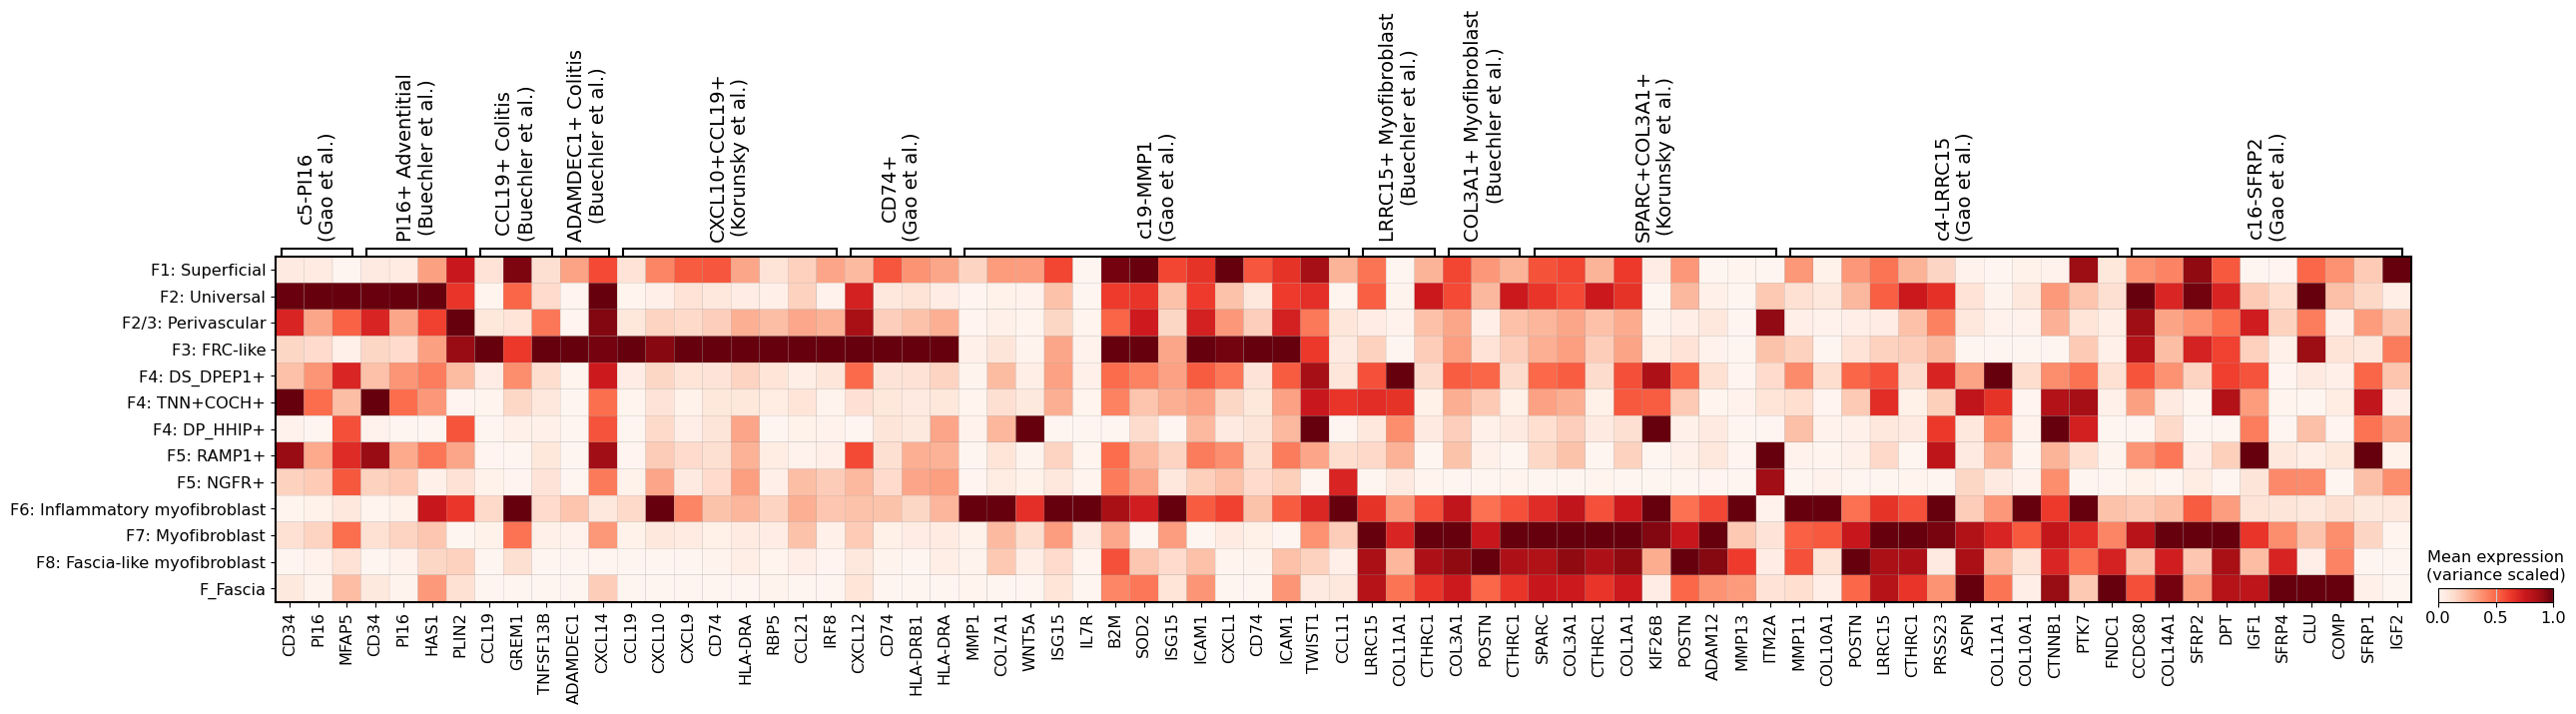

In [6]:
CROSS_TISSUE_MARKERS = {                                                                  "c5-PI16\n(Gao et al.)": ["CD34", "PI16", "MFAP5", ],
                                                "PI16+ Adventitial\n(Buechler et al.)" : ["CD34", "PI16", "HAS1", "PLIN2"],
                        


                        "CCL19+ Colitis\n(Buechler et al.)" : ["CCL19", "GREM1", "TNFSF13B"],
          "ADAMDEC1+ Colitis\n(Buechler et al.)": ["ADAMDEC1", "CXCL14"],
                                            "CXCL10+CCL19+\n(Korunsky et al.)": ["CCL19", "CXCL10", "CXCL9", "CD74", "HLA-DRA", "RBP5", "CCL21", "IRF8"],
                    "CD74+\n(Gao et al.)": ['CXCL12', 'CD74', 'HLA-DRB1', 'HLA-DRA'],

                               "c19-MMP1\n(Gao et al.)": ["MMP1", "COL7A1", "WNT5A", "ISG15", "IL7R", "B2M", "SOD2", "ISG15", "ICAM1", "CXCL1", "CD74", "ICAM1", "TWIST1", "CCL11"],

          "LRRC15+ Myofibroblast\n(Buechler et al.)": ["LRRC15", "COL11A1", "CTHRC1"],
          "COL3A1+ Myofibroblast\n(Buechler et al.)": ["COL3A1", "POSTN", "CTHRC1"],
        "SPARC+COL3A1+\n(Korunsky et al.)": ["SPARC", "COL3A1", "CTHRC1", "COL1A1", "KIF26B", "POSTN", "ADAM12", "MMP13", "ITM2A"  ],
       "c4-LRRC15\n(Gao et al.)": ["MMP11", "COL10A1", "POSTN", "LRRC15", "CTHRC1", "PRSS23", "ASPN", "COL11A1", "COL10A1", "CTNNB1", "PTK7", "FNDC1"],
    "c16-SFRP2\n(Gao et al.)": ["CCDC80", "COL14A1", "SFRP2", "DPT", "IGF1", "SFRP4", "CLU", "COMP", "SFRP1", "IGF2"] ,
                 

                                                      

          
          
                       }
    
sc.pl.matrixplot(
    adata_lesional,
    CROSS_TISSUE_MARKERS,cmap="Reds",
    groupby="test13",#vmax=1.2,
    standard_scale="var", colorbar_title='Mean expression\n(variance scaled)',
    dendrogram=False,
     save="fig6a_crosstissuecomparison.pdf"
)         
 

In [7]:
del(adata_lesional)
import gc
gc.collect()

30454

# Fig 6b - by tissue

In [8]:
adata=sc.read_h5ad('/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_fbsonly_crosstissue.h5ad')
    
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata.var_names]
    return LIST



/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


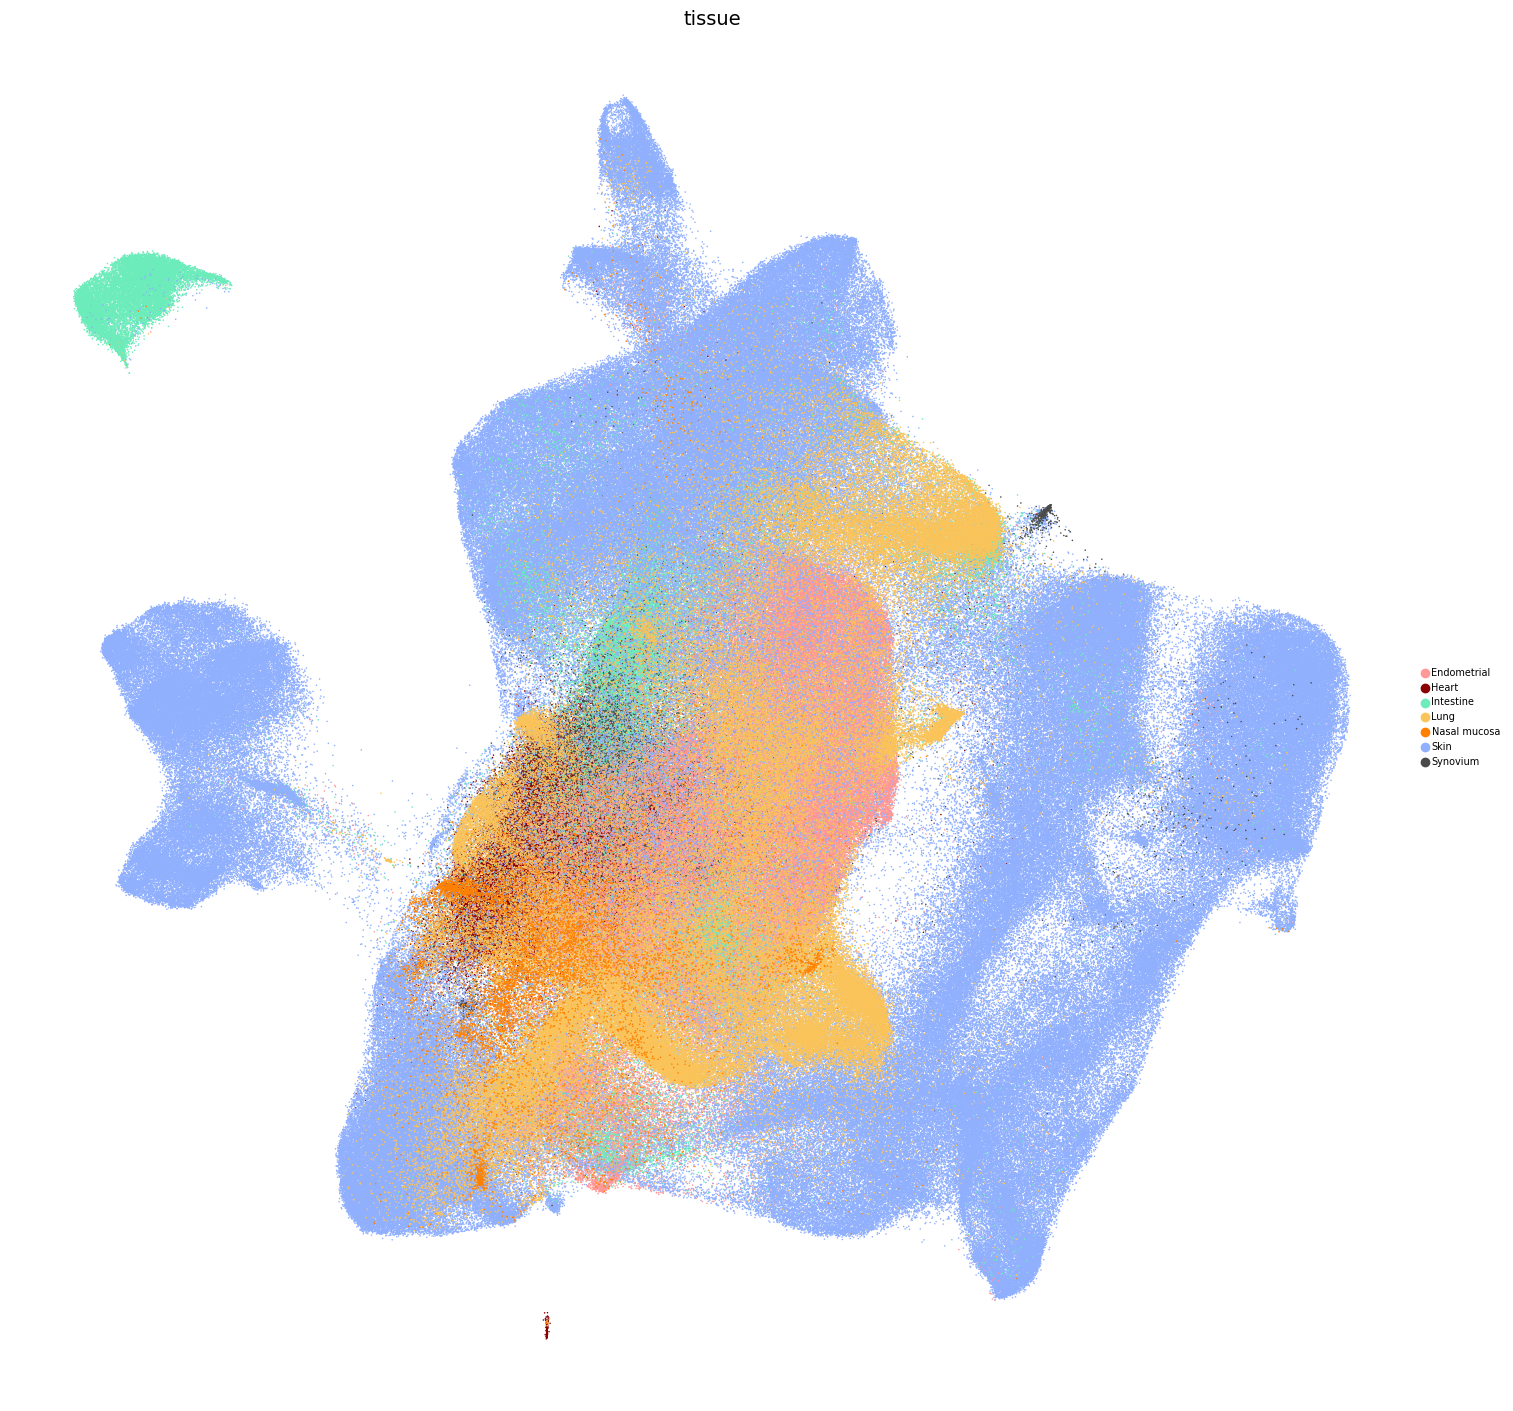

In [9]:
COLORS = {
    'Skin': "#90b0fe",# "#8ddae4",
    'Nasal mucosa': "#FF8000",
    'Intestine': "#6BECBA",
    'Heart': "#8B0000",
    'Synovium': "#4A4A4A",
    'Endometrial':  "#ff9896",# "#FF66A1",
    'Lung':  "#fbc45a",# bRown#F0E0D6",#"#E4D1B9",#"#8E4585",# "#E6E6FA", ##"#ffc658",#"#FFFFE0",  #¢"#9B59B6", #"#aa40fc",#"#c6b0d5",#"#FFFF00",#"#f4c2c2",  # Light pink for Lung
}

adata.obs["tissue"] = adata.obs["tissue"].astype("category")
adata.uns["tissue_colors"] = [COLORS[t] for t in adata.obs["tissue"].cat.categories]

sc.pl.umap(
    adata,
    color="tissue",
    s=5,
    legend_fontsize=7,
    save="fig6b_fbs_bytissue.pdf"

)

In [10]:
try:
    del(adata.uns["tissue_colors"])
except:
    1
try:
    del(adata.uns["clusters_final2_colors"])
except:
    1
try:
    del(adata.uns["clusters_final_colors"])
except:
    1


In [11]:
adata2=adata
adata3=adata[adata.obs["tissue"]!="Skin"]
adata4 = adata3[~adata3.obs["clusters_final"].str.startswith("Non")]
adata4.obs.tissue.value_counts()

tissue
Lung            103577
Endometrial     100821
Intestine        52152
Synovium         13514
Heart            10155
Nasal mucosa      6450
Name: count, dtype: int64

In [12]:
with open("/nfs/team298/ls34/hlca_fb_labels_merged.pkl", "rb") as file:
    hlca_labels = pickle.load(file)

adata.obs["original_annotation"] = (
     adata.obs.index.to_series().map(hlca_labels).fillna(adata.obs["tissue"])
)



In [13]:
with open('/nfs/team298/ls34/ibd_fb_labels.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

adata.obs["original_annotation"] = (
     adata.obs.index.to_series().map(loaded_dict).fillna(adata.obs["original_annotation"])
)



In [14]:
file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'
with open(file_path, 'rb') as file:
    GENES = pickle.load(file)


ALL_GENES = {
    "F1": GENES["F1"],
    "F3": GENES["F3"],
    "F6": GENES["F6"],
    "F7": GENES["F7"],
    "F8": GENES["F8"]
}


In [15]:
adata.obs["clusters2"]=adata.obs["clusters_final"]

# Fig 6d

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.group

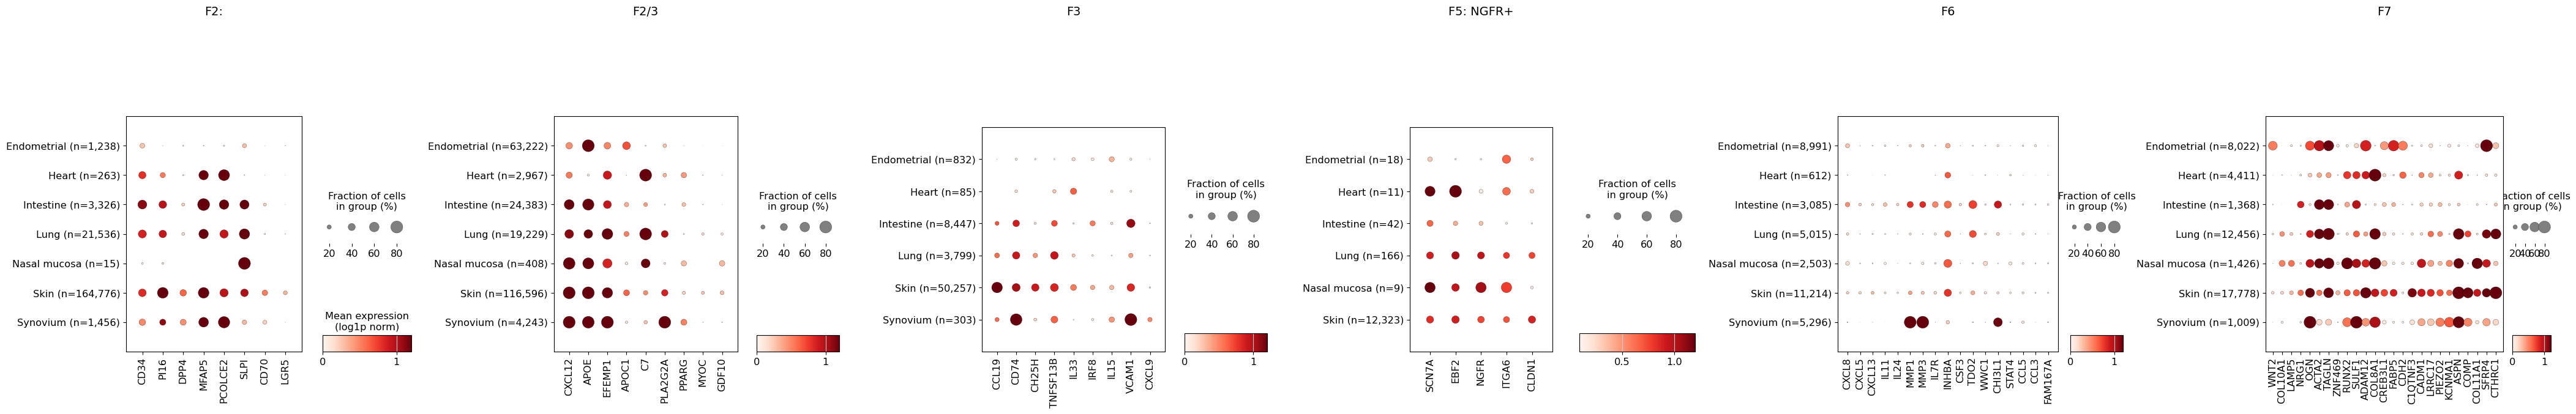

In [20]:
ALL_GENES_SHORT = {'F1': ['APCDD1',
  'COL18A1',
  'COL23A1',
  'COL13A1',
  'NKD2',
  'RSPO1',
  'AXIN2',
  'WIF1'],
 'F2:': ['CD34',
  'PI16',
  'DPP4',
  'MFAP5',
  'PCOLCE2',
  'SLPI',
  'CD70',
  'LGR5'],
 'F2/3': ['CXCL12',
  'APOE',
  'EFEMP1',
  'APOC1',
  'C7',
  'PLA2G2A',
  'PPARG',
  'MYOC',
  'GDF10'],
 'F3': ['CCL19',
  'CD74',
  'CH25H',
  'TNFSF13B',
  'IL33',
  'IRF8',
  'IL15',
  'VCAM1',
  'HLA-DRA',
  'HLA-DRB1', "ADAMDEC1", "CXCL9"],
 # 'F4: DS_DPEP1+': ['MEF2C', 'DPEP1', 'MYL4'],
 # 'F4: TNN+COCH+': ['TNN',
 #  'COCH',
 #  'CRABP1',
 #  'COL24A1',
 #  'RSPO4',
 #  'SLITRK6',
 #  'NRG3',
 #  'MKX',
 #  'TNMD'],
 'F5': ['SCN7A', 'FMO2', 'FGFBP2', 'OLFML2A'],
 'F5: RAMP1+': ['RAMP1', 'RELN', 'PLEKHA6', 'IGFBP2', 'SFRP1'],
 'F5: NGFR+': ['SCN7A',#'FMO2', 'FGFBP2', 'OLFML2A',
               'EBF2', 'NGFR', 'ITGA6', 'CDH19', 'CLDN1'],
 'F1+F6': ['WNT5A', 'COL7A1'],
 'F6': ['CXCL8',
  'CXCL5',
  'CXCL6',
  'CXCL13',
  'IL11',
  'IL24',
  'MMP1',
  'MMP3',
  'IL7R',
  'INHBA',
  'CSF3',
  'TDO2',
  'WWC1',
  'CHI3L1',
  'STAT4',
  'CCL5',
  'CCL3',
  'CCL11',
  'FAM167A'],
 'F7': ['WNT2',
  'COL10A1',
  'LAMP5',
  'NRG1',
  'OGN',
  'ACTA2',
  'TAGLN',
  'KIF26B',
  'ZNF469',
  'RUNX2',
  'SULF1',
  'ADAM12',
  'COL8A1',
  'LRRC15',
  'CREB3L1',
  'FABP5',
  'CDH2',
  'C1QTNF3',
  'CADM1',
  'LRRC17',
  'PIEZO2',
  'KCNMA1', 
               'ASPN', 'COMP', 'COL11A1', 'SFRP4', 'CTHRC1'],
 'F8': ['ACAN','SCX', 'THBS4', 'ITGA10', 'EVI2A', 'FGF18', 'PRG4', 'CRTAC1']
                  }
LIST_TO_PLOT = [  'F2:', "F2/3", 'F3', "F5: NGFR+",  'F6','F7']
fig, axes = plt.subplots(1, len(LIST_TO_PLOT), figsize=(len(LIST_TO_PLOT) * 7, 7))


for i, POPULATION in enumerate(LIST_TO_PLOT):
    adata_ii = adata[adata.obs["clusters2"].str.startswith(POPULATION)].copy()
    tissue_counts = adata_ii.obs["tissue"].value_counts()
    tissue_counts = tissue_counts[tissue_counts > 1]

    adata_ii.obs["tissue_with_counts"] = adata_ii.obs["tissue"].map(
        lambda x: f"{x} (n={tissue_counts.get(x, 0):,})"
    )
    
    dp = sc.pl.dotplot(
        adata_ii,
        remove_markers(ALL_GENES_SHORT[POPULATION]),
        cmap="Reds",
        groupby="tissue_with_counts",
        colorbar_title="Mean expression\n(log1p norm)" if i == 0 else None,
        vmax=1.2,
        dendrogram=False,
        title=POPULATION,
        ax=axes[i],
        show=False,
        dot_max=0.8
    )

plt.tight_layout()

fig.savefig("6D.pdf", dpi=300, bbox_inches="tight")
plt.show()

NameError: name 'STOP' is not defined

In [ ]:
adata[adata.obs["clusters_final"]==""].obs["tissue"].value_counts()

In [ ]:
adata.obs["clusters_final"].value_counts()

In [19]:
adata[adata.obs["tissue"]=="Endometrial"].obs.clusters_final.value_counts()

clusters_final
F2/3: Perivascular                63222
Non-skin1                         44762
F1: Superficial                   16828
F6: Inflammatory myofibroblast     8991
F7: Myofibroblast                  8022
F2: Universal                      1238
F8: Fascia-like myofibroblast      1050
F3: FRC-like                        832
F5: RAMP1+                          542
F4: Hair-follicle associated         78
F5: NGFR+                            18
Name: count, dtype: int64

In [ ]:
adata.obs["tissue"].value_counts()

In [ ]:
ALL_GENES_SHORT = {'F1': ['APCDD1',
  'COL18A1',
  'COL23A1',
  'COL13A1',
  'NKD2',
  'RSPO1',
  'AXIN2',
  'WIF1'],
 'F2': ['CD34',
  'PI16',
  'DPP4',
  'MFAP5',
  'PCOLCE2',
  'SLPI',
  'CD70',
  'LGR5'],
 'F2/3': ['CXCL12',
  'APOE',
  'EFEMP1',
  'APOC1',
  'C7',
  'PLA2G2A',
  'PPARG',
  'MYOC',
  'GDF10'],
 'F3': ['CCL19',
  'CD74',
  'CH25H',
  'TNFSF13B',
  'IL33',
  'IRF8',
  'IL15',
  'VCAM1',
  'HLA-DRA',
  'HLA-DRB1', "ADAMDEC1", "CXCL9"],
 # 'F4: DS_DPEP1+': ['MEF2C', 'DPEP1', 'MYL4'],
 # 'F4: TNN+COCH+': ['TNN',
 #  'COCH',
 #  'CRABP1',
 #  'COL24A1',
 #  'RSPO4',
 #  'SLITRK6',
 #  'NRG3',
 #  'MKX',
 #  'TNMD'],
 'F5': ['SCN7A', 'FMO2', 'FGFBP2', 'OLFML2A'],
 'F5: RAMP1+': ['RAMP1', 'RELN', 'PLEKHA6', 'IGFBP2', 'SFRP1'],
 'F5: NGFR+': ['SCN7A',#'FMO2', 'FGFBP2', 'OLFML2A',
               'EBF2', 'NGFR', 'ITGA6', 'CDH19', 'CLDN1'],
 'F1+F6': ['WNT5A', 'COL7A1'],
 'F6': ['CXCL8',
  'CXCL5',
  'CXCL6',
  'CXCL13',
  'IL11',
  'IL24',
  'MMP1',
  'MMP3',
  'IL7R',
  'INHBA',
  'CSF3',
  'TDO2',
  'WWC1',
  'CHI3L1',
  'STAT4',
  'CCL5',
  'CCL3',
  'CCL11',
  'FAM167A'],
 'F7': ['WNT2',
  'COL10A1',
  'LAMP5',
  'NRG1',
  'OGN',
  'ACTA2',
  'TAGLN',
  'KIF26B',
  #'ZNF469',
  'RUNX2',
  'SULF1',
  'ADAM12',
  'COL8A1',
  'LRRC15',
 # 'CREB3L1',
  #'FABP5',
  'CDH2',
  #'C1QTNF3',
  #'CADM1',
  'LRRC17',
  'PIEZO2',
 # 'KCNMA1', 
               'ASPN', 'COMP', 'COL11A1', 'SFRP4', 'CTHRC1'],
 'F8': ['ACAN','SCX', 'THBS4', 'ITGA10', 'EVI2A', 'FGF18', 'PRG4', 'CRTAC1']
                  }
LIST_TO_PLOT = [  'F2', "F2/3", 'F3', "F5: NGFR+",  'F6','F7']
fig, axes = plt.subplots(1, len(LIST_TO_PLOT), figsize=(len(LIST_TO_PLOT) * 7, 7))


for i, POPULATION in enumerate(LIST_TO_PLOT):
    adata_ii = adata[adata.obs["clusters2"].str.startswith(POPULATION)].copy()
    tissue_counts = adata_ii.obs["tissue"].value_counts()
    tissue_counts = tissue_counts[tissue_counts > 1]

    adata_ii.obs["tissue_with_counts"] = adata_ii.obs["tissue"].map(
        lambda x: f"{x} (n={tissue_counts.get(x, 0):,})"
    )
#     if POPULATION.startswith("F6"): 
#         dp = sc.pl.dotplot(
#         adata_ii,
#         remove_markers(ALL_GENES_SHORT[POPULATION]),
#         cmap="Reds",
#         groupby="tissue_with_counts",
#         colorbar_title="Mean expression\n(log1p norm)" if i == 0 else None,
#         vmax=1.2,
#         dendrogram=False,
#         title=POPULATION,
#         ax=axes[i],
#         show=False,
#         dot_max=0.4
#     )
    dp = sc.pl.dotplot(
            adata_ii,
            remove_markers(ALL_GENES_SHORT[POPULATION]),
            cmap="Reds",
            groupby="tissue_with_counts",
            colorbar_title="Mean expression\n(log1p norm)" if i == 0 else None,
            vmax=1.2,
            dendrogram=False,
            title=POPULATION,
            ax=axes[i],
            show=False,
            dot_max=0.8
        )

plt.tight_layout()

fig.savefig("6D_alt_smallerf7panep.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
LIST_TO_PLOT = [  'F6', ]

for i, POPULATION in enumerate(LIST_TO_PLOT):
    adata_ii = adata[adata.obs["clusters2"].str.startswith(POPULATION)].copy()
    tissue_counts = adata_ii.obs["tissue"].value_counts()
    tissue_counts = tissue_counts[tissue_counts > 1]

    adata_ii.obs["tissue_with_counts"] = adata_ii.obs["tissue"].map(
        lambda x: f"{x} (n={tissue_counts.get(x, 0):,})"
    )

sc.pl.dotplot(
        adata_ii,
        remove_markers(ALL_GENES_SHORT[POPULATION]),
        cmap="Reds",
        groupby="tissue_with_counts",
        colorbar_title="Mean expression\n(log1p norm)" if i == 0 else None,
        vmax=1.2,
        dendrogram=False,
        title=POPULATION,
        dot_max=0.3,
        save="f6_only.pdf",
)


In [ ]:
LIST_TO_PLOT = [  'F1', "F5: RAMP1+", 'F8', ]

fig, axes = plt.subplots(1, len(LIST_TO_PLOT), figsize=(len(LIST_TO_PLOT) * 7, 7))



for i, POPULATION in enumerate(LIST_TO_PLOT):
    adata_ii = adata[adata.obs["clusters2"].str.startswith(POPULATION)].copy()
    tissue_counts = adata_ii.obs["tissue"].value_counts()
    tissue_counts = tissue_counts[tissue_counts > 1]

    adata_ii.obs["tissue_with_counts"] = adata_ii.obs["tissue"].map(
        lambda x: f"{x} (n={tissue_counts.get(x, 0):,})"
    )

    dp = sc.pl.dotplot(
        adata_ii,
        remove_markers(ALL_GENES_SHORT[POPULATION]),
        cmap="Reds",
        groupby="tissue_with_counts",
        colorbar_title="Mean expression\n(log1p norm)" if i == 0 else None,
        vmax=1.2,
        dendrogram=False,
        title=POPULATION,
        ax=axes[i],
        show=False,
        dot_max=0.8
    )

plt.tight_layout()
plt.show()

# sfig 8d

In [ ]:
LIST_TO_PLOT = [  'F1', ]

for i, POPULATION in enumerate(LIST_TO_PLOT):
    adata_ii = adata[adata.obs["clusters2"].str.startswith(POPULATION)].copy()
    tissue_counts = adata_ii.obs["tissue"].value_counts()
    tissue_counts = tissue_counts[tissue_counts > 1]

    adata_ii.obs["tissue_with_counts"] = adata_ii.obs["tissue"].map(
        lambda x: f"{x} (n={tissue_counts.get(x, 0):,})"
    )

sc.pl.dotplot(
        adata_ii,
        remove_markers(ALL_GENES_SHORT[POPULATION]),
        cmap="Reds",
        groupby="tissue_with_counts",
        colorbar_title="Mean expression\n(log1p norm)" if i == 0 else None,
        vmax=1.2,
        dendrogram=False,
        title=POPULATION,
        dot_max=0.8,
        save="supp8d_by_tissue_F1only.pdf",
)


# Fig 6c

In [ ]:
COLORS = {
    'F1: Superficial':   '#ffef5a',
 'F8: Fascia-like myofibroblast':  '#dd7465',
 'F2: Universal': '#91bae2',
 'F3: FRC-like': '#c6508f',
 'F6: Inflammatory myofibroblast':  "#75fbfd",
 'F2/3: Perivascular': '#364f99',
     'F2/3: Stroma_PPARG+': '#364f99',

 'F4':  '#3d6f3b',
     'F4: Hair-follicle associated':  '#3d6f3b',
    
        'F4: DP_HHIP+': '#c9efb4',
    'F4: DS_DPEP1+': '#3d6f3b',
    'F4: TNN+COCH+': '#00f273',
    'F5: NGFR+': '#8981a7',
    'F5: RAMP1+': '#4b2657',

 'F5': '#4b2657',
  'F7: Myofibroblast':  "#2f6565",
   'F_Fascia':  "#0000004D",
                          
    
    
#     "F_Fascia": np.array([0, 0, 0, 0.3]),
    
    "Pericyte": "#8B0000",  # Dark red
    "Non-skin0": "#A9A9A9",  # Dark grey
    "Non-skin1": "#808080",  # Medium grey
    "Non-skin2": "#696969",  # Dim grey
        "Non-skin"  : "#808080", #"#696969",  # Dim grey

    "Myofibroblast PRG4+": "#585858",  # Slate grey
    "Non-skin myofibroblast": "#E0E0E0",  # Slate grey

    "Other": '#FFFFFF',  # Light grey
        'Skin': "#90b0fe",# "#8ddae4",
    'Nasal mucosa': "#FF8000",
 #   'Skin SSc': "#c9a0dc",
    'Intestine': "#6BECBA",
    'Heart': "#8B0000",
    'Synovium': "#000000", #"#4A4A4A",
    'Endometrial':  "#ff9896",# "#FF66A1",
    'Lung':"#FFD700",  #¢"#9B59B6", #"#aa40fc",#"#c6b0d5",#"#FFFF00",#"#f4c2c2",  # Light pink for Lung
    "Lung_IPF (?HLCA repeat)": "#FFD700",  
}

#adata.obs["clusters"] = adata.obs["clusters"].astype("category")
#adata.uns["clusters_colors"] = [COLORS[cat] for cat in adata.obs["clusters"].cat.categories]

adata.obs["clusters2"] = adata.obs["clusters2"].astype("category")
adata.uns["clusters2_colors"] = [COLORS[cat] for cat in adata.obs["clusters2"].cat.categories]




for n in [5, 10 ]:
    sc.pl.umap(
        adata,
        color="clusters2",
        s=n,
        vmax=2,
        vmin=0,
        #legend_loc="on data",
        legend_fontoutline=2,
        legend_fontsize=4,
        title='',
        save = f"fig6d_pointsize{n}.pdf"
    )


In [ ]:
adata.obs["skin_vs_other"] = np.where(
    adata.obs["tissue"] == "Skin",
    adata.obs["clusters2"],
    adata.obs["tissue"]
)

In [ ]:
conditions = [
    (adata.obs["tissue"] == "Skin") & (~adata.obs["clusters2"].str.startswith("Non")),
    (adata.obs["tissue"] == "Skin") & (adata.obs["clusters2"].str.startswith("Non")),
    (adata.obs["tissue"] != "Skin")
]

choices = [
    adata.obs["clusters2"],
    adata.obs["annotation2"],
    adata.obs["tissue"]
]

adata.obs["skin_vs_other"] = np.select(conditions, choices, default=np.nan)

In [ ]:
adata=adata[adata.obs["skin_vs_other"]!="Skin"]

In [ ]:
adata.obs["clusters2"]=adata.obs["clusters_final"] 
adata.obs["clusters_final"].value_counts()

In [ ]:
RENAME = {"Non-skin1": "Non-skin",
          "Non-skin2": "Non-skin",
         }
adata.obs["clusters"]=adata.obs["clusters"].map(RENAME).fillna(adata.obs["clusters"])
adata.obs["clusters2"]=adata.obs["clusters2"].map(RENAME).fillna(adata.obs["clusters2"])

In [ ]:
ORDER2 = ['F1: Superficial', 
          'F2: Universal', 
          "F2/3: Perivascular",
         'F3: FRC-like', 
          'F4: Hair-follicle associated',
         'F5: RAMP1+', 
          'F5: NGFR+',
         'F6: Inflammatory myofibroblast', 
          'F7: Myofibroblast', 
        'F8: Fascia-like myofibroblast', 
         'F_Fascia',
          'Non-skin',
        # 'Non-skin1', 
        #  'Non-skin2', 
          #'Non-skin myofibroblast'
         ]
adata.obs['clusters2'] = pd.Categorical(adata.obs['clusters2'], categories=ORDER2, ordered=True)
adata.obs["clusters2"].value_counts()

# Supplementary 8b

In [ ]:
sc.settings.figdir = "sfig8"


In [ ]:
ORDER2_REVERSE = ORDER2[::-1]

adata.obs['tissue'] = adata.obs['tissue'].astype('category')
adata.obs['clusters2'] = adata.obs['clusters2'].astype('category')

cluster_tissue_counts = adata.obs.groupby('clusters2')['tissue'].value_counts(normalize=True).unstack().fillna(0)
overall_tissue_counts = adata.obs['tissue'].value_counts(normalize=True).reindex(cluster_tissue_counts.columns).fillna(0)
overall_tissue_counts.name = 'All fibroblasts'
cluster_tissue_counts = pd.concat([overall_tissue_counts.to_frame().T, cluster_tissue_counts])

cluster_tissue_counts = cluster_tissue_counts.reindex( ORDER2_REVERSE + ['All fibroblasts'] )

colors = [COLORS[t] for t in cluster_tissue_counts.columns]

fig, ax = plt.subplots(figsize=(6, len(cluster_tissue_counts) * 0.5))

spacing_factor = 0.3
positions = np.arange(len(cluster_tissue_counts), dtype=float)  # Ensure float dtype
positions[-1:] += spacing_factor  # Add a small offset after "ALL"

left = np.zeros(len(cluster_tissue_counts))
for tissue, color in zip(cluster_tissue_counts.columns, colors):
    ax.barh(positions, cluster_tissue_counts[tissue], left=left, color=color, 
                edgecolor="black",  
        linewidth=0.5 )
    left += cluster_tissue_counts[tissue]

ax.set_xticks([])  # Hide x-axis ticks
ax.set_yticks(positions)  # Ensure correct y-tick positions
ax.set_yticklabels(cluster_tissue_counts.index)  # Set y-tick labels from clusters
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in colors]
labels = cluster_tissue_counts.columns
fig.legend(handles, labels, loc='upper center', ncol=len(labels), 
           frameon=False, fontsize=12)

ax.grid(False)
plt.savefig("sfig8/supp8b_proportions_in_fbs.pdf", dpi=300, bbox_inches="tight", format="pdf")
plt.show()

In [ ]:
file_path = '/nfs/team298/ls34/fb_dict_lesional_FORWOUND.pkl'
with open(file_path, 'rb') as file:
    ALL_GENES_NOF8_PLUSDP = pickle.load(file)

 

In [ ]:
ALLGENES_REMOVE_F4 = {'F1': ['APCDD1',
  'COL18A1',
  'COL23A1',
  'COL13A1',
  'NKD2',
  'RSPO1',
  'AXIN2',
  'WIF1',
  'CRABP1',
  'TNFRSF21'],
 'F2: Universal': ['CD34',
  'PI16',
  'DPP4',
  'MFAP5',
  'PCOLCE2',
  'SLPI',
  'CD70',
  'LGR5'],
 'F2/3: Bridge': ['CXCL12',
  'APOE',
  'APOC1',
  'C7',
  'PLA2G2A',
  'PPARG',
  'MYOC',
  'GDF10'],
 'F3': ['CCL19',
  'CD74',
  'CH25H',
  'TNFSF13B',
  'IL33',
  'IRF8',
  'IL15',
  'HLA-DRA',
  'ADAMDEC1',
  'CXCL9'],
 # 'F4: DS_DPEP1+': ['DPEP1', 'MYL4'],
 # 'F4: TNN+COCH+': ['TNN', 'COCH', 'RSPO4', 'MKX'],
 'F5': ['SCN7A', 'FMO2', 'FGFBP2', 'OLFML2A'],
 'F5: RAMP1+': ['RAMP1', 'RELN'],
 'F5: NGFR+': ['EBF2', 'NGFR', 'ITGA6', 'CLDN1', 'CDH19'],
 'F1+F6': ['WNT5A', 'COL7A1'],
 'F6': ['CXCL8',
  'CXCL5',
  'CXCL6',
  'CXCL13',
  'IL11',
  'IL24',
  'MMP1',
  'MMP3',
  'IL7R',
  'INHBA',
  'CSF3',
  'TDO2',
  'WWC1',
  'CHI3L1',
  'CCL5',
  'CCL11',
  'HIF1A'],
 'F6+F7': ['WNT2', 'COL10A1', 'LAMP5'],
 'F7': ['NRG1', 'OGN'],
 'F6-8': ['ACTA2',
  'TAGLN',
  'ASPN',
  'COMP',
  'COL11A1',
  'KIF26B',
  'ZNF469',
  'RUNX2',
  'SULF1',
  'ADAM12',
  'COL8A1',
  'LRRC15',
  'CREB3L1',
  'CTHRC1',
  'CCN4',
  'FABP5',
  'CDH2'],

                      'F7+F8': ['C1QTNF3', 'CADM1', 'LRRC17', 'PIEZO2', 'SFRP4', 'KCNMA1'],
                     "F8": GENES["F8"]
                     }

In [ ]:
adata4=adata4[adata4.obs["clusters_final"]!="F4: Hair-follicle associated"] # remove F4 as almost entirely from skin
counts = adata4.obs["clusters_final"].value_counts()
new_labels = {label: f"{label} n={counts[label]}" for label in counts.index}
adata4.obs["clusters_final_counts"] = adata4.obs["clusters_final"].map(new_labels)
sc.pl.dotplot(
    adata4,
    remove_markers(ALLGENES_REMOVE_F4),
    groupby=f'clusters_final_counts',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
        save="7d_dotplot_nonskinfbs_withcounts.pdf",
    
    categories_order=[ 'F1: Superficial n=71450','F2: Universal n=27834',
        'F2/3: Perivascular n=114452',  'F3: FRC-like n=13466','F5: RAMP1+ n=701',
         'F5: NGFR+ n=246', 
         'F6: Inflammatory myofibroblast n=25502','F7: Myofibroblast n=28692', 'F8: Fascia-like myofibroblast n=3971']

    #save="dotplot_wounds.pdf"
)

In [ ]:
import gc
del(adata4)
gc.collect()

In [ ]:
adata22 = adata2[~adata2.obs["disease_id2"].isin(["Skin", "Healthy", "Nonlesional"])]
adata22.obs["disease_id2"].value_counts()

In [ ]:
adata_f3=adata22[adata22.obs["clusters2"].str.startswith("F3")]
adata_f3=adata_f3.copy()
adata_f3.obs["disease_id2"].value_counts()

# fig 7a

In [ ]:
sc.settings.figdir = "fig8"


In [ ]:
RENAME = {'IBD': 'Inflammation',
 'Myocardial infarction': 'Fibrosis',
 'RA': 'Inflammation',
 'COVID-19': 'Inflammation',
 'Lung cancer - adenocarcinoma': 'Cancer',
 'Pulmonary fibrosis': 'Fibrosis',
 'Rhinosinusitis w nasal polyps/rhinitis': 'Inflammation',
 'Interstitial lung disease': 'Fibrosis',
 'Hypersensitivity pneumonitis': 'Other',
 'Lung cancer - squamous cell': 'Cancer',
 'COPD': 'Other',
 'Non-specific interstitial pneumonia': 'Other',
 'Lung cancer - pleomorphic': 'Cancer',
 'Lung cancer - large cell': 'Cancer'}
adata22.obs["disease_category"]=adata22.obs["disease_id2"].map(RENAME)

In [ ]:

# Filter data

# Apply prefix filtering
adata22.obs["clusters2"] = adata22.obs["clusters_final"].apply(
    lambda x: x if pd.Series(x).str.contains("^F3:|^F6|^F7|^F8").any() else "Other"
)

# Define disease order
ORDER_DISEASE = ['Inflammation', 'Cancer', 'Fibrosis', 'Other']
#ORDER_DISEASE = ORDER_DISEASE[::-1]

# Ensure categorical data types
adata22.obs['disease_category'] = adata22.obs['disease_category'].astype('category')
adata22.obs['clusters2'] = adata22.obs['clusters2'].astype('category')

# Compute proportions
cluster_tissue_counts = adata22.obs.groupby('disease_category')['clusters2'].value_counts(normalize=True).unstack().fillna(0)

# Reorder cluster_tissue_counts according to the specified order
cluster_tissue_counts = cluster_tissue_counts.loc[ORDER_DISEASE]

# Calculate the total number of cells for each disease
total_cells_per_disease = adata22.obs['disease_category'].value_counts().loc[ORDER_DISEASE]

# --- Keep Figure the Same ---
fig, ax = plt.subplots(figsize=(len(cluster_tissue_counts) * .9, 7))  # Adjust width for readability

positions = np.arange(len(cluster_tissue_counts))  # X-axis positions (disease types)
bottom = np.zeros(len(cluster_tissue_counts))  # Initialize for stacking

# --- Plot Stacked Bars ---
colors = [COLORS[t] for t in cluster_tissue_counts.columns]

for tissue, color in zip(cluster_tissue_counts.columns, colors):
    ax.bar(positions, cluster_tissue_counts[tissue], bottom=bottom, color=color, edgecolor="black", linewidth=0.5)
    bottom += cluster_tissue_counts[tissue]  # Update the "bottom" for stacking

# --- Add X-Ticks ---
ax.set_xticks(positions)
ax.set_xticklabels([f"{disease}" for disease in cluster_tissue_counts.index],
                rotation=90, fontsize=16)

# --- Add Y-Ticks and Y-Label ---
ax.set_yticks([0, 0.5, 1])  
ax.set_yticklabels(["0", "0.5", "1"])  
ax.set_ylabel("Proportion", fontsize=12)

# --- Adjust Spines ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# --- Add Legend ---
handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in colors]
labels = cluster_tissue_counts.columns
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, fontsize=12)

# --- Final Adjustments ---
ax.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# Ensure order for disease_id2
#ORDER_DISEASE_ID2 = [d for d in ORDER_DISEASE if d in adata22.obs['disease_id2'].unique()]
ORDER_DISEASE_CATEGORY = ['Inflammation', 'Cancer', 'Fibrosis', 'Other']

ORDER_DISEASE_ID2 =  [ 
    'IBD', 'COVID-19',  'RA','Rhinosinusitis w nasal polyps/rhinitis',
    'Lung cancer - pleomorphic', 'Lung cancer - large cell', 'Lung cancer - adenocarcinoma', 'Lung cancer - squamous cell',
     'Interstitial lung disease', 'Pulmonary fibrosis', 
    'Myocardial infarction',# 'Endometrial', 
    'Hypersensitivity pneumonitis', 'Non-specific interstitial pneumonia',
    'COPD',
]
# --------- First Plot (disease_id2) ---------
adata22.obs["clusters2"] = np.where(
    adata22.obs["clusters_final"].str.contains(r"^F3:|^F6|^F7", regex=True),
    adata22.obs["clusters_final"],
    "Other"
)
cluster_tissue_counts_1 = adata22.obs.groupby('disease_id2')['clusters2'].value_counts(normalize=True).unstack().fillna(0)
cluster_tissue_counts_1 = cluster_tissue_counts_1.reindex(ORDER_DISEASE_ID2)
total_cells_per_disease_1 = adata22.obs['disease_id2'].value_counts().reindex(ORDER_DISEASE_ID2)

positions_1 = np.arange(len(cluster_tissue_counts_1))
bottom_1 = np.zeros(len(cluster_tissue_counts_1))

colors_1 = [COLORS[t] for t in cluster_tissue_counts_1.columns]

fig, axs = plt.subplots(1, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [3.5, 1]})

# Plot Stacked Bars for the First Plot
for tissue, color in zip(cluster_tissue_counts_1.columns, colors_1):
    axs[0].bar(positions_1, cluster_tissue_counts_1[tissue], bottom=bottom_1, color=color, 
               edgecolor="white", linewidth=0.5)
    bottom_1 += cluster_tissue_counts_1[tissue]

axs[0].set_xticks(positions_1)
axs[0].set_xticklabels([f"{disease}\nn={total_cells_per_disease_1[disease]:,}" 
                        for disease in cluster_tissue_counts_1.index], rotation=90,
                        fontsize=16)
axs[0].set_yticks([0, 0.5, 1])
axs[0].set_yticklabels(["0", "0.5", "1"])
axs[0].set_ylabel("Proportion", fontsize=16)
axs[0].grid(False)  # Remove background grid

# Remove Top and Right Borders
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# --------- Second Plot (disease_category) ---------
adata22.obs["clusters2"] = np.where(
    adata22.obs["clusters_final"].str.contains(r"^F3:|^F6|^F7", regex=True),
    adata22.obs["clusters_final"],
    "Other"
)
cluster_tissue_counts_2 = adata22.obs.groupby('disease_category')['clusters2'].value_counts(normalize=True).unstack().fillna(0)
cluster_tissue_counts_2 = cluster_tissue_counts_2.reindex(ORDER_DISEASE_CATEGORY)
total_cells_per_disease_2 = adata22.obs['disease_category'].value_counts().reindex(ORDER_DISEASE_CATEGORY)

positions_2 = np.arange(len(cluster_tissue_counts_2))
bottom_2 = np.zeros(len(cluster_tissue_counts_2))

colors_2 = [COLORS[t] for t in cluster_tissue_counts_2.columns]

for tissue, color in zip(cluster_tissue_counts_2.columns, colors_2):
    axs[1].bar(positions_2, cluster_tissue_counts_2[tissue], bottom=bottom_2, color=color, 
               edgecolor="white", linewidth=0.5)
    bottom_2 += cluster_tissue_counts_2[tissue]

axs[1].set_xticks(positions_2)
axs[1].set_xticklabels([f"{disease}" for disease in cluster_tissue_counts_2.index],
                        rotation=90, fontsize=16)
axs[1].set_yticks([0, 0.5, 1])
axs[1].set_yticklabels(["0", "0.5", "1"])
axs[1].set_ylabel("Proportion", fontsize=16)
axs[1].grid(False)

# Remove Top and Right Borders
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# --- Add Shared Legend ---
handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in colors_1]
labels = cluster_tissue_counts_1.columns
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, frameon=False, fontsize=12)

plt.tight_layout()
fig.savefig("fig7/fig7a.pdf", dpi=300, bbox_inches="tight", format="pdf")

plt.show()

In [ ]:
RENAME = {'IBD': 'Inflammation',
 'Myocardial infarction': 'Fibrosis',
 'RA': 'Inflammation',
 'COVID-19': 'Inflammation',
 'Lung cancer - adenocarcinoma': 'Cancer',
 'Pulmonary fibrosis': 'Fibrosis',
 'Rhinosinusitis w nasal polyps/rhinitis': 'Inflammation',
 'Interstitial lung disease': 'Fibrosis',
 'Hypersensitivity pneumonitis': 'Other',
 'Lung cancer - squamous cell': 'Cancer',
 'COPD': 'Other',
 'Non-specific interstitial pneumonia': 'Other',
 'Lung cancer - pleomorphic': 'Cancer',
 'Lung cancer - large cell': 'Cancer'}
adata2.obs["disease_category"]=adata2.obs["disease_id2"].map(RENAME).fillna(adata22.obs["disease_id2"])
adata2.obs["disease_category"].value_counts()

In [ ]:
# adata22 = adata2[~adata2.obs["disease_id2"].isin(["Skin", "Healthy", "Nonlesional"])]
# adata22 = adata22[adata22.obs["disease_id2"]!="Endometrial"]
# {x:x for x in adata22.obs["disease_id2"].unique()}
# adata2.obs["disease_category"].value_counts()

In [ ]:
#adata22 = adata2[~adata2.obs["disease_id2"].isin(["Healthy", "Nonlesional"])]

ORDER= [ 
    'IBD', 'COVID-19',  'RA','Rhinosinusitis w nasal polyps/rhinitis',
    'Lung cancer - pleomorphic', 'Lung cancer - large cell', 'Lung cancer - adenocarcinoma', 'Lung cancer - squamous cell',
    'Non-specific interstitial pneumonia', 'Hypersensitivity pneumonitis', 'Interstitial lung disease', 'Pulmonary fibrosis', 
    'Myocardial infarction',# 'Endometrial', 
    'COPD',
]
ORDER = ORDER+["Skin"]

In [ ]:
total_fibroblasts_per_disease = adata.obs.groupby("disease_id2")["clusters_final"].count()
fibroblast_subtype_counts = adata.obs.groupby(["disease_id2", "clusters_final"]).size().unstack(fill_value=0)

fibroblast_subtype_proportions = fibroblast_subtype_counts.div(total_fibroblasts_per_disease, axis=0)



In [ ]:
# Define file path
file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'

# Load the object
with open(file_path, 'rb') as file:
    GENES = pickle.load(file)



In [ ]:
ORDER1=['Skin (n=28,525)', 'IBD (n=6,758)',  'COVID-19 (n=919)','RA (n=303)', 
      'Interstitial lung disease (n=521)',
         'Pulmonary fibrosis (n=982)', 
        'Myocardial infarction (n=85)', 
       ]

In [ ]:
ORDER2=['Skin (n=9,745)', 
        'IBD (n=3,045)',    'COVID-19 (n=2,641)',  'RA (n=5,296)', 'Rhinosinusitis w nasal polyps/rhinitis (n=1,932)', 
 #   'Lung cancer - pleomorphic (n=0)', 
        'Lung cancer - large cell (n=55)',  'Lung cancer - adenocarcinoma (n=124)',  'Lung cancer - squamous cell (n=56)', 
 'Interstitial lung disease (n=596)',     'Pulmonary fibrosis (n=863)',

             'Myocardial infarction (n=612)', 'COPD (n=13)', ]

# HLCA

In [ ]:
adata_lung=sc.read_h5ad('/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_hlca_withnewclustering.h5ad')


In [ ]:
adata_lung.obs["ssb"]=[x if x=="Healthy" else "Disease" for x in adata_lung.obs["disease_id2"]]
                
               
            
    

In [ ]:
adata_lung= adata_lung[adata_lung.obs["original_annotation"]!="pericytes"]
adata_lung= adata_lung[adata_lung.obs["original_annotation"]!="Pericytes"]

In [ ]:
cell_counts = adata_lung.obs["original_annotation"].value_counts()
valid_categories = cell_counts[cell_counts >= 50].index
adata_lung = adata_lung[adata_lung.obs["original_annotation"].isin(valid_categories)].copy()

#adata_lung=adata_lung[adata_lung.obs["original_annotation"]!="Lung"]
LUNG_ORDER = [ 'Alveolar fibroblasts',
                             'Peribronchial fibroblasts',
              'Adventitial fibroblasts',
               'Subpleural fibroblasts',
             'Fibroblasts PLIN2+',
  'Lipofibroblasts',
                                     'Fibroblasts WIF1+ CHRM2+',
 'Nerve-associated fibroblasts',
              'Secondary crest myofibroblast',
 'Activated myofibroblasts',   '3_Myofibroblasts', #'Pericytes',  
              'None',  'Lung', 
]

LUNG_ORDER2 = [ 'Alveolar fibroblasts',
                             'Peribronchial fibroblasts',
              'Adventitial fibroblasts',
               'Subpleural fibroblasts',
             'Fibroblasts PLIN2+',
  'Lipofibroblasts',
                                     'Fibroblasts WIF1+ CHRM2+',
 'Nerve-associated fibroblasts',
              'Secondary crest myofibroblast',
 'Activated myofibroblasts', # '3_Myofibroblasts',
               "No label/none"
]

In [ ]:
RENAME = {"Lung" : "No label/none",
          "None" : "No label/none",}
adata_lung.obs["original_annotation2"] = adata_lung.obs["original_annotation"].map(RENAME).fillna(adata_lung.obs["original_annotation"])

In [ ]:
import pickle
with open("/nfs/team298/ls34/hlca_fb_labels_merged.pkl", "rb") as file:
    hlca_labels = pickle.load(file)
    
    


# # Create mapping dictionary from adata_myofb
# mapping_dict = adata_myofb.obs["test"].to_dict()

adata_lung.obs["original_annotation"] = (
     adata_lung.obs.index.to_series().map(hlca_labels).fillna(adata_lung.obs["original_annotation"])
)
adata_lung.obs["original_annotation"].value_counts()
adata_lung= adata_lung[adata_lung.obs["original_annotation"]!="Pericytes"]


In [ ]:
adata_lung.obs["new_clusters"].value_counts()

In [ ]:
adata_lung[adata_lung.obs["new_clusters"] == "F3-like"].obs["original_annotation"].value_counts()


In [ ]:
counts = adata_lung[adata_lung.obs["new_clusters"] == "F3-like"].obs["original_annotation"].value_counts()
counts

In [ ]:

# Minimalist bar plot
plt.figure(figsize=(4, 2))  # Adjust figure size
plt.bar(counts.index, counts.values, color="#e60000")  # Red bars (#e60000)

# Labels
plt.xlabel("Original annotation (HLCA)", fontsize=10)
plt.ylabel("Cell counts", fontsize=10)

# Formatting
plt.xticks(rotation=90, fontsize=8)  # Rotate x-axis labels for readability
plt.yticks(fontsize=8)
plt.gca().spines[['top', 'right', 'left']].set_visible(False)  # Hide unnecessary spines
plt.gca().spines['bottom'].set_color("gray")  # Light bottom spine
plt.grid(False)  # Remove background grid

# Save figure as PDF with high DPI
plt.savefig("fig7/7f_original_new_annotations_hlca.pdf", format="pdf", dpi=300, bbox_inches="tight")

plt.show()

In [ ]:
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata.var_names]
    return LIST


 

In [ ]:
sc.pl.dotplot(
    adata_lung,
    remove_markers(ALLGENES_REMOVE_F4),
    groupby=f'original_annotation2',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
    categories_order=LUNG_ORDER2,
    save="sfig7d_fibroblasts_with_skin_markers.pdf"
)


In [ ]:
del(adata2)
del(adata22)
del(adata)
gc.collect()

# TAURUS plots

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scanpy as sc
from matplotlib.ticker import MultipleLocator


In [ ]:
adata_ibd=sc.read_h5ad('/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_fbs_ibdTAURUS.h5ad')
adata=adata_ibd
adata.X[:6,:6].A



In [ ]:
out = adata_ibd.obs["outcome"]
scores = pd.to_numeric(out, errors="coerce")
bins   = [-np.inf, 2, 4, 6, 8, 10]          
labels = ["<2", "2-4", "4-6", "6-8", "8-10"]

binned = pd.cut(scores, bins=bins, labels=labels, right=False)

adata_ibd.obs["outcome_grouped"] = np.where(
    out == "Pre",           
    "Pre",                  
    binned.astype(str)     
)
order = ["Pre"] + labels
adata_ibd.obs["outcome_grouped"] = pd.Categorical(
    adata_ibd.obs["outcome_grouped"], categories=order, ordered=True
)

#print(adata_ibd.obs["outcome_grouped"].value_counts(dropna=False))

In [ ]:
counts = adata_ibd.obs["donor"].value_counts()
good_donors = counts[counts >= 500].index
adata_ibd = adata_ibd[adata_ibd.obs["donor"].isin(good_donors)].copy()



In [ ]:
# adata_ibd[adata_ibd.obs["treatment"]=="Pre"].obs.score.value_counts()

In [ ]:
# list(adata_ibd[(adata_ibd.obs["outcome_grouped"]=="8-10")|
#               (adata_ibd.obs["outcome_grouped"]=="6-8")
#               ].obs.donor.unique())

In [ ]:
adata_ibd = adata_ibd[adata_ibd.obs['Site_status']!="Healthy"]

In [ ]:
RENAME = { "Lesional": "Inflamed IBD",
          "Nonlesional": "Non-inflamed IBD"}
adata_ibd.obs["Site_status"] = adata_ibd.obs["Site_status"].map(RENAME)

In [ ]:
site_counts = adata_ibd.obs['Site_status'].value_counts()
valid_sites = site_counts[site_counts >= 50].index
adata_ibd = adata_ibd[adata_ibd.obs['Site_status'].isin(valid_sites)]

In [ ]:
COLORS = {
    'F1: Superficial':   '#ffef5a',
 'F8: Fascia-like myofibroblast':  '#dd7465',
 'F2: Universal': '#91bae2',
 'F3: FRC-like': '#c6508f',
 'F6: Inflammatory myofibroblast':  "#75fbfd",
 'F2/3: Perivascular': '#364f99',
     'F2/3: Stroma_PPARG+': '#364f99',

 'F4':  '#3d6f3b',
     'F4: Hair-follicle associated':  '#3d6f3b',
    
        'F4: DP_HHIP+': '#c9efb4',
    'F4: DS_DPEP1+': '#3d6f3b',
    'F4: TNN+COCH+': '#00f273',
    'F5: NGFR+': '#8981a7',
    'F5: RAMP1+': '#4b2657',

 'F5': '#4b2657',
  'F7: Myofibroblast':  "#2f6565",
   'F_Fascia':  "#0000004D",
                          
    
    
#     "F_Fascia": np.array([0, 0, 0, 0.3]),
    
    "Pericyte": "#8B0000",  # Dark red
    "Non-skin0": "#A9A9A9",  # Dark grey
    "Non-skin1": "#808080",  # Medium grey
    "Non-skin2": "#696969",  # Dim grey
        "Non-skin"  : "#808080", #"#696969",  # Dim grey

    "Myofibroblast PRG4+": "#585858",  # Slate grey
    "Non-skin myofibroblast": "#E0E0E0",  # Slate grey

    "Other": '#FFFFFF',  # Light grey
        'Skin': "#90b0fe",# "#8ddae4",
    'Nasal mucosa': "#FF8000",
 #   'Skin SSc': "#c9a0dc",
    'Intestine': "#6BECBA",
    'Heart': "#8B0000",
    'Synovium': "#000000", #"#4A4A4A",
    'Endometrial':  "#ff9896",# "#FF66A1",
    'Lung':"#FFD700",  #¢"#9B59B6", #"#aa40fc",#"#c6b0d5",#"#FFFF00",#"#f4c2c2",  # Light pink for Lung
    "Lung_IPF (?HLCA repeat)": "#FFD700",  
}

In [ ]:
adata_ibd.obs['clusters'] = adata_ibd.obs['clusters'].astype('category')
adata_ibd.obs['Site_status'] = adata_ibd.obs['Site_status'].astype('category')
adata_ibd.obs['sample_id'] = adata_ibd.obs['sample_id'].astype('category')  # Ensure sample_id is categorical

cluster_tissue_counts = (
    adata_ibd.obs.groupby(['Site_status', 'sample_id'])['clusters']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

cluster_tissue_counts.index = [
    f"{site} (Donor {donor})" for site, donor in cluster_tissue_counts.index
]
cluster_tissue_counts = cluster_tissue_counts.loc[cluster_tissue_counts.sum(axis=1) > 0]
colors = [COLORS.get(t, "gray") for t in cluster_tissue_counts.columns]
num_samples = len(cluster_tissue_counts)
fig_height = min(0.4 * num_samples, 50)  # Keep it reasonable



In [ ]:
adata_ibd2 = adata_ibd[adata_ibd.obs["treatment"] !="Post"]
adata_ibd2.obs["score"]=adata_ibd2.obs["score"].astype('float32')



In [ ]:
adata_ibd3=adata_ibd2[adata_ibd2.obs["Site_status"]=="Inflamed IBD"]

In [ ]:
adata_ibd2.obs['clusters'] = adata_ibd2.obs['clusters'].astype('category')
adata_ibd2.obs['sample_id'] = adata_ibd2.obs['sample_id'].astype('category')
adata_ibd2.obs['Site_status'] = adata_ibd2.obs['Site_status'].astype('category')

f6_cells = adata_ibd2.obs[adata_ibd2.obs['clusters'] == "F6: Inflammatory myofibroblast"]
f6_proportions = f6_cells.groupby(["sample_id", "Site_status"]).size() / adata_ibd2.obs.groupby("sample_id").size()
f6_proportions = f6_proportions.reset_index(name="f6_proportion")

custom_colors = ["#d8656d", "#00ffff"]
site_statuses = f6_proportions['Site_status'].unique()
color_map = {status: custom_colors[i % len(custom_colors)] for i, status in enumerate(site_statuses)}

adata_ibd3.obs['clusters'] = adata_ibd3.obs['clusters'].astype('category')
adata_ibd3.obs['sample_id'] = adata_ibd3.obs['sample_id'].astype('category')
adata_ibd3.obs['score'] = adata_ibd3.obs['score'].astype('float32')

f6_cells = adata_ibd3.obs[adata_ibd3.obs['clusters'] == "F6: Inflammatory myofibroblast"]
f6_proportion = (
    f6_cells.groupby("sample_id").size() / adata_ibd3.obs.groupby("sample_id").size()
).fillna(0)

sample_scores = adata_ibd3.obs.groupby("sample_id")["score"].mean()
sample_site_status = adata_ibd3.obs.groupby("sample_id")["Site_status"].first().astype(str)
plot_data2 = pd.DataFrame({
    "score": sample_scores,
    "f6_proportion": f6_proportion,
    "Site_status": sample_site_status
}).dropna()

plot_data2 = plot_data2.sort_values("score")
custom_colors2 = ["#00ffff"]
unique_statuses = plot_data2["Site_status"].unique()
color_map2 = {status: custom_colors2[i % len(custom_colors2)] for i, status in enumerate(unique_statuses)}
plot_data2["color"] = plot_data2["Site_status"].map(color_map2)
fig, axes = plt.subplots(1, 2, figsize=(5, 4), gridspec_kw={'width_ratios': [1, 1]})

yticks = np.arange(0, 0.6, 0.1)  

sns.barplot(x="Site_status", y="f6_proportion", data=f6_proportions, ax=axes[0], palette=color_map, ci=None)
sns.scatterplot(x="Site_status", y="f6_proportion", data=f6_proportions, ax=axes[0], color="black", s=10, alpha=0.2, edgecolor="white", marker="o")

axes[0].set_ylabel("Proportion of F6 (per sample)", fontsize=10)
axes[0].tick_params(axis='x', labelsize=10, rotation=90)
axes[0].grid(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].set_xlabel("")

axes[0].set_yticks(yticks)
axes[0].set_ylim(0, 0.5)
axes[0].yaxis.set_major_locator(MultipleLocator(0.1))  # Ensures identical tick placement
axes[0].tick_params(axis='y', labelsize=10)  # Force same font size for y-ticks
scatter2 = axes[1].scatter(
    plot_data2["score"], plot_data2["f6_proportion"],
    s=10, c=plot_data2["color"], alpha=.8, edgecolors="black"
)
sns.regplot(x="score", y="f6_proportion", data=plot_data2, ax=axes[1], scatter=False, color="black", line_kws={'linewidth': 1})

axes[1].set_xlabel("Inflammation score", fontsize=10)
axes[1].set_ylabel("", fontsize=0)
axes[1].tick_params(axis='both', which='major', labelsize=10)
axes[1].set_ylim(0, 0.5)
axes[1].set_xlim(left=0)
axes[1].grid(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)


axes[1].set_yticks(yticks)
axes[1].yaxis.set_major_locator(MultipleLocator(0.1))  # Ensures identical tick placement
axes[1].tick_params(axis='y', labelsize=10)  # Force same font size for y-ticks


axes[0].spines['left'].set_position(('outward', 0))  # Ensure left spine is identical
axes[1].spines['left'].set_position(('outward', 0))  # This prevents the extra small tick on the right
axes[1].spines['left'].set_visible(True)  # Ensure left spine is visible

plt.subplots_adjust(wspace=0.1)   
fig.align_ylabels(axes)   

plt.tight_layout()
plt.savefig("fig7/7e_taurus_bothplots.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={'width_ratios': [1, 1]}, dpi=300)

yticks = np.arange(0, 0.6, 0.1)

sns.barplot(x="Site_status", y="f6_proportion", data=f6_proportions, ax=axes[0], palette=color_map, ci=None)
sns.scatterplot(x="Site_status", y="f6_proportion", data=f6_proportions, ax=axes[0],
                color="grey", s=10, alpha=0.2, edgecolor="black", marker="o", linewidth=1)

axes[0].set_ylabel("Proportion of F6 (per sample)", fontsize=10)
axes[0].set_xlabel("", fontsize=0)
axes[0].tick_params(axis='x', labelsize=10, rotation=0)
axes[0].grid(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].set_yticks(yticks)
axes[0].set_ylim(0, 0.52)
axes[0].yaxis.set_major_locator(MultipleLocator(0.1))
axes[0].tick_params(axis='y', labelsize=10)
new_labels = [f"{status}\nn={site_counts[status]:,}" for status in site_statuses]
axes[0].set_xticklabels(new_labels)

axes[1].scatter(
    plot_data2["score"], plot_data2["f6_proportion"],
    s=10, c="#00ffff", alpha=0.8, edgecolors="black"
)
sns.regplot(x="score", y="f6_proportion", data=plot_data2, ax=axes[1], scatter=False, color="black", line_kws={'linewidth': 1})
axes[1].set_xlabel("Inflammation score", fontsize=10)
axes[1].set_ylabel("", fontsize=0)
axes[1].tick_params(axis='both', which='major', labelsize=10)
axes[1].set_ylim(0, 0.52)
axes[1].set_xlim(left=0)
axes[1].grid(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set_yticks(yticks)
axes[1].yaxis.set_major_locator(MultipleLocator(0.1))
axes[1].tick_params(axis='y', labelsize=10)
axes[0].spines['left'].set_position(('outward', 0))
axes[1].spines['left'].set_position(('outward', 0))
axes[1].spines['left'].set_visible(True)

plt.subplots_adjust(wspace=0.1)
fig.align_ylabels(axes)
plt.tight_layout()

plt.savefig("fig7/7e_taurus_bothplots_changecolors.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(5, 4), gridspec_kw={'width_ratios': [1, 1]}, dpi=300)

yticks = np.arange(0, 0.6, 0.1)

sns.barplot(x="Site_status", y="f6_proportion", data=f6_proportions, ax=axes[0], palette=color_map, ci=None)
sns.scatterplot(x="Site_status", y="f6_proportion", data=f6_proportions, ax=axes[0],
                color="grey", s=10, alpha=0.2, edgecolor="black", marker="o", linewidth=1)

axes[0].set_ylabel("Proportion of F6 (per sample)", fontsize=10)
axes[0].set_xlabel("", fontsize=0)
axes[0].tick_params(axis='x', labelsize=10, rotation=0)
axes[0].grid(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].set_yticks(yticks)
axes[0].set_ylim(0, 0.52)
axes[0].yaxis.set_major_locator(MultipleLocator(0.1))
axes[0].tick_params(axis='y', labelsize=10)
new_labels = [f"{status}\nn={site_counts[status]:,}" for status in site_statuses]
axes[0].set_xticklabels(new_labels)


axes[1].scatter(
    plot_data2["score"], plot_data2["f6_proportion"],
    s=10, c="#00ffff", alpha=0.8, edgecolors="black"
)
sns.regplot(x="score", y="f6_proportion", data=plot_data2, ax=axes[1], scatter=False, color="black", line_kws={'linewidth': 1})
axes[1].set_xlabel("Inflammation score", fontsize=10)
axes[1].set_ylabel("", fontsize=0)
axes[1].tick_params(axis='both', which='major', labelsize=10)
axes[1].set_ylim(0, 0.52)
axes[1].set_xlim(left=0)
axes[1].grid(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set_yticks(yticks)
axes[1].yaxis.set_major_locator(MultipleLocator(0.1))
axes[1].tick_params(axis='y', labelsize=10)
axes[0].spines['left'].set_position(('outward', 0))
axes[1].spines['left'].set_position(('outward', 0))
axes[1].spines['left'].set_visible(True)

plt.subplots_adjust(wspace=0.1)
fig.align_ylabels(axes)
plt.tight_layout()

plt.savefig("fig7/7e_taurus_bothplots_changecolors_changedims.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
sc.logging.print_versions()


